In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
import numpy as np
import gmaps
import sys
gmaps.configure(api_key='Your Key Here')

In [3]:
conn = sqlite3.connect('../DataBootcamp Project 1/188-million-us-wildfires/FPA_FOD_20170508.sqlite')

In [7]:
df = pd.read_sql("""
                       
                        SELECT *
                        from fires 
                        where state='CA'
                        
                       """, con=conn)

In [8]:
## Pull in Discovery Date & Contained Date as Dates from SQL DB
Disc_Date_Conv = pd.read_sql("""
                                SELECT date(DISCOVERY_DATE) as date
                                FROM fires
                                Where State = 'CA'

                                """,con = conn)
Disc_Date_Conv.date = pd.to_datetime(Disc_Date_Conv.date)
Cont_Date_Conv = pd.read_sql("""
                                SELECT date(CONT_DATE) as date
                                FROM fires
                                Where State = 'CA'

                                """,con = conn)
Cont_Date_Conv.date = pd.to_datetime(Cont_Date_Conv.date)



In [9]:
## Add formatted Discovery Date & Contained Date to new columns 
df['Discovery_Date_st'] = Disc_Date_Conv
df['Contained_Date_st'] = Cont_Date_Conv

### Calculate Burn Duration (Discovery Dt - Contained Dt)
df['Burn_Duration']= df['Contained_Date_st'] - df['Discovery_Date_st']

### Convert Burn Duration to number and populate in new column called 'Burn Days' 
df['Burn_Days']=df.Burn_Duration.dt.days

### Add Column for Acres Burned per Day ()
# df['Fire_Speed-Acres_Burned_per_Day'] = df.FIRE_SIZE/df.Burn_Days 

df.head(1)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,Discovery_Date_st,Contained_Date_st,Burn_Duration,Burn_Days
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,2005-02-02,2005-02-02,0 days,0.0


In [10]:
df_ltlng_mean = df.groupby('FIPS_NAME').mean()
df_ltlng_mean_Counties1 = df_ltlng_mean[['LATITUDE','LONGITUDE']]
df_ltlng_mean_Counties = df_ltlng_mean_Counties1.reset_index()
df_ltlng_mean_Counties

,FIPS_NAME,LATITUDE,LONGITUDE
0,Alameda,37.672148,-121.831872
1,Alpine,38.621888,-119.818923
2,Amador,38.442836,-120.626019
3,Butte,39.646106,-121.577767
4,Calaveras,38.200839,-120.564172
5,Colusa,39.112718,-122.340138
6,Contra Costa,37.948516,-121.982377
7,Del Norte,41.754130,-123.990408
8,Douglas,38.797200,-119.752500
9,El Dorado,38.775029,-120.611765


In [12]:
df1 = pd.read_csv('2016_2.csv')
df2 = pd.read_csv('2017_2.csv')
df3 = pd.read_csv('2018_2.csv')
df1["FIRE_SIZE"] = pd.to_numeric(df1["FIRE_SIZE"])
df2["FIRE_SIZE"] = pd.to_numeric(df2["FIRE_SIZE"])
df3["FIRE_SIZE"] = pd.to_numeric(df3["FIRE_SIZE"])

# df1["FIRE_SIZE"] = pd.to_datetime(df1['DISCOVERY_DATE'])
# df2["FIRE_SIZE"] = pd.to_datetime(df2['DISCOVERY_DATE'])
# df3["FIRE_SIZE"] = pd.to_datetime(df3['DISCOVERY_DATE'])

# df1["FIRE_SIZE"] = pd.to_datetime(df1['CONT_DATE'])
# df2["FIRE_SIZE"] = pd.to_datetime(df2['CONT_DATE'])
# df3["FIRE_SIZE"] = pd.to_datetime(df3['CONT_DATE'])

# Create Datafame with 1992-2018 Fire Data

frames = [df1,df2,df3]
dfnew = pd.concat(frames,sort = True)
dfnew['FIPS_NAME']=dfnew[' FIPS_NAME']
dfnew = dfnew.drop('LONGITUDE',axis=1)

dfnew_mg=pd.merge(dfnew,df_ltlng_mean_Counties,on='FIPS_NAME',how='left')
dfnew_mg.head()

frames2 = [df,dfnew_mg] 
dfnew2 = pd.concat(frames2,sort = True)
#Drop Columns with Spaces to avoid duplicates and extra columns
dfnew2=dfnew2.drop([' LATITUDE',' FIPS_NAME',' OWNER_DESCR',' STATE','OWNER_CODE',' Shape','COUNTY','FIPS_CODE'],axis=1)
dfnew2.head()

,Burn_Days,Burn_Duration,COMPLEX_NAME,CONT_DATE,CONT_DOY,CONT_TIME,Contained_Date_st,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,...,OBJECTID,OWNER_DESCR,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,SOURCE_SYSTEM,SOURCE_SYSTEM_TYPE,STATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,Shape
0,0.0,0 days,None,2.4534e+06,33.0,1730,2005-02-02,2.4534e+06,33.0,1300,...,1.0,USFS,0511,Plumas National Forest,FS-FIRESTAT,FED,CA,9.0,Miscellaneous,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,0.0,0 days,None,2.45314e+06,133.0,1530,2004-05-12,2.45314e+06,133.0,0845,...,2.0,USFS,0503,Eldorado National Forest,FS-FIRESTAT,FED,CA,1.0,Lightning,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,0.0,0 days,None,2.45316e+06,152.0,2024,2004-05-31,2.45316e+06,152.0,1921,...,3.0,STATE OR PRIVATE,0503,Eldorado National Forest,FS-FIRESTAT,FED,CA,5.0,Debris Burning,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,5.0,5 days,None,2.45319e+06,185.0,1400,2004-07-03,2.45318e+06,180.0,1600,...,4.0,USFS,0503,Eldorado National Forest,FS-FIRESTAT,FED,CA,1.0,Lightning,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5.0,5 days,None,2.45319e+06,185.0,1200,2004-07-03,2.45318e+06,180.0,1600,...,5.0,USFS,0503,Eldorado National Forest,FS-FIRESTAT,FED,CA,1.0,Lightning,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


### Create Summary Dataframe with only Pertinent Columns

In [13]:
## Pare down table to columns being used
df_summary = dfnew2[[
       'FIRE_NAME','SOURCE_REPORTING_UNIT_NAME', 'FIRE_YEAR',
       'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_DESCR', 'STATE','FIPS_NAME', 'Discovery_Date_st',
       'Contained_Date_st', 'Burn_Duration','Burn_Days']]
df_summary.tail(20)
# df_summary.loc[df_summary.Burn_Duration == df_summary.Burn_Duration.max()]


,FIRE_NAME,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,FIPS_NAME,Discovery_Date_st,Contained_Date_st,Burn_Duration,Burn_Days
132,NaN,NaN,2018,NaN,1500.0,F,38.350219,-122.044567,NaN,NaN,Solano,NaT,NaT,NaT,19.0
133,NaN,NaN,2018,NaN,64.0,D,36.697126,-121.241227,NaN,NaN,San Benito,NaT,NaT,NaT,3.0
134,NaN,NaN,2018,NaN,1261.0,G,33.764895,-116.824247,NaN,NaN,Riverside,NaT,NaT,NaT,4.0
135,NaN,NaN,2018,NaN,15185.0,G,39.021598,-122.722614,NaN,NaN,Lake,NaT,NaT,NaT,15.0
136,NaN,NaN,2018,NaN,1000.0,F,32.915043,-116.795573,NaN,NaN,San Diego,NaT,NaT,NaT,1.0
137,NaN,NaN,2018,NaN,1800.0,F,32.915043,-116.795573,NaN,NaN,San Diego,NaT,NaT,NaT,5.0
138,NaN,NaN,2018,NaN,4564.0,F,37.273943,-120.657424,NaN,NaN,Merced,NaT,NaT,NaT,6.0
139,NaN,NaN,2018,NaN,2070.0,F,36.894899,-118.212232,NaN,NaN,Inyo,NaT,NaT,NaT,44.0
140,NaN,NaN,2018,NaN,2490.0,F,38.469873,-122.326029,NaN,NaN,Napa,NaT,NaT,NaT,7.0
141,NaN,NaN,2018,NaN,1352.0,F,34.383465,-118.235428,NaN,NaN,Los Angeles,NaT,NaT,NaT,9.0


### Create Summary Tables using Groupby

In [44]:
#Summary by Year
df_summary_year = df_summary.groupby(['FIRE_YEAR']) 
df_summary_max = df_summary.groupby(['FIRE_YEAR']).max()
df_summary_min = df_summary.groupby(['FIRE_YEAR']).min()
df_summary_avg = df_summary.groupby(['FIRE_YEAR']).mean()

#Summary by Year by Cause
df_summary_YearxCause = df_summary.groupby(['FIRE_YEAR','STAT_CAUSE_DESCR'])
df_summary_YearxCause_max = df_summary_YearxCause.max() 
df_summary_YearxCause_avg = df_summary_YearxCause.mean()
# df_summary_YearxCause_max[['FIRE_SIZE','Burn_Days','Fire_Speed-Acres_Burned_per_Day']].head()

#Summary by Year by County (FIPS Name)
df_summary_YearxCounty = df_summary.groupby(['FIRE_YEAR','FIPS_NAME'])
df_summary_YearxCounty_max = df_summary_YearxCounty.max()
df_summary_YearxCounty_avg = df_summary_YearxCounty.mean()
df_summary_YearxCounty_avg[['FIRE_SIZE','Burn_Days']]

df_summary_max.head()

,SOURCE_REPORTING_UNIT_NAME,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,Discovery_Date_st,Contained_Date_st,Burn_Duration,Burn_Days
FIRE_YEAR,,,,,,,,,,,,
1992,Yuma Field Office,Structure,64000.0,G,42.000000,-114.184100,USFS,CA,1992-12-31,1993-10-27,365 days,365.0
1993,Yuma Field Office,Structure,43201.0,G,41.996667,-114.463056,USFS,CA,1993-12-31,1993-12-30,97 days,97.0
1994,Yosemite National Park,Structure,48851.0,G,42.001667,-114.481111,USFS,CA,1994-12-31,1994-12-31,93 days,93.0
1995,Yuma Field Office,Structure,23455.0,G,42.001944,-114.125800,USFS,CA,1995-12-31,1996-01-09,365 days,365.0
1996,Yuma Field Office,Structure,106668.0,G,41.998056,-114.484100,USFS,CA,1996-12-30,1996-12-30,102 days,102.0


## Pie of Fire Size by class for Total Observed Period

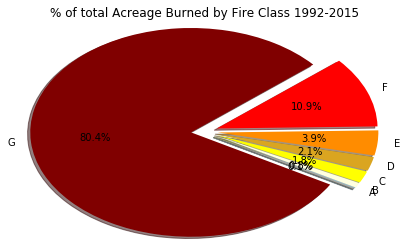

In [18]:
## Create Pie of Fire Size by class for total

df_summary_class = df_summary.groupby(['FIRE_SIZE_CLASS']).sum()
df_summary_class['FIRE_SIZE']
explode=(.1,.1,.1,.1,.1,.1,.1)
plt.pie(df_summary_class['FIRE_SIZE'],labels=df_summary_class.index,autopct='%1.1f%%',explode=explode,radius=1.2,startangle=-30,shadow=True,colors=['skyblue','lightyellow','yellow','goldenrod','darkorange','red','maroon'])
plt.title('% of total Acreage Burned by Fire Class 1992-2015')

plt.show()

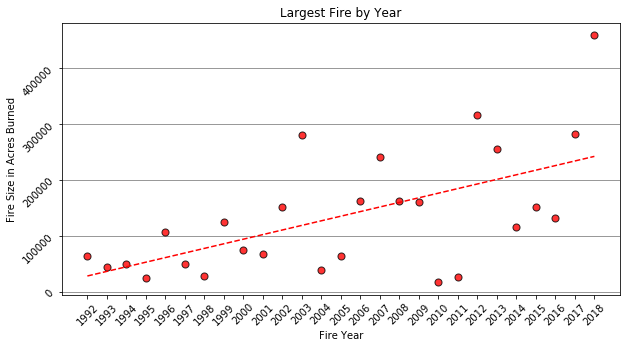

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(df_summary_max.index,df_summary_max.FIRE_SIZE,c='red',s=50, alpha = .8,edgecolor='black',)
plt.ylabel('Fire Size in Acres Burned')
plt.xlabel('Fire Year')
plt.title('Largest Fire by Year')
plt.xticks(np.arange(1992,2019), rotation=45,)
plt.yticks(rotation=45)
plt.grid(b=True,axis='y',color='black',alpha=.5)

# Establish trend line
x = df_summary_max.index
y = df_summary_max.FIRE_SIZE
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.savefig('Largest_FirexYear.png')
plt.show()

# Multi-Variable Scatter Plots

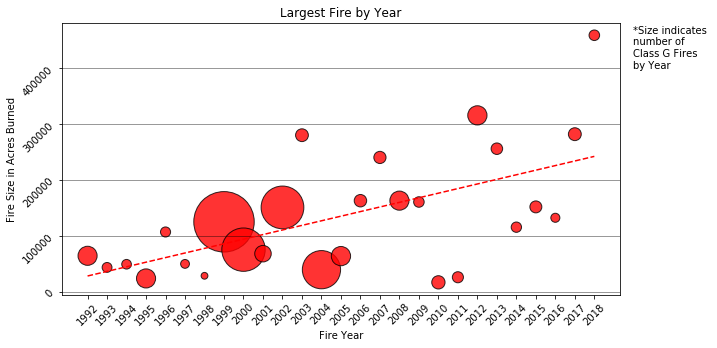

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(df_summary_max.index,df_summary_max.FIRE_SIZE,c='red',s=df_summary_max.Burn_Days, alpha = .8,edgecolor='black',)
plt.ylabel('Fire Size in Acres Burned')
plt.xlabel('Fire Year')
plt.title('Largest Fire by Year')
plt.text(2020,400000,'''*Size indicates 
number of 
Class G Fires 
by Year''')
plt.xticks(np.arange(1992,2019), rotation=45,)
plt.yticks(rotation=45)
plt.grid(b=True,axis='y',color='black',alpha=.5)

# Establish trend line
x = df_summary_max.index
y = df_summary_max.FIRE_SIZE
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.savefig('Largest_FirexYear&Duration.png')
plt.show()

In [26]:
## Seaborn Scatter Time

# sns.scatterplot(x=df_summary_max.index,y=df_summary_max.FIRE_SIZE,hue=df_summary_max.index,size=df_summary_max.Burn_Days,sizes=(3,5,7,9))
# plt.legend(loc=(1.1,.2))
# plt.xticks(np.arange(1992,2016), rotation=45)
# plt.show()

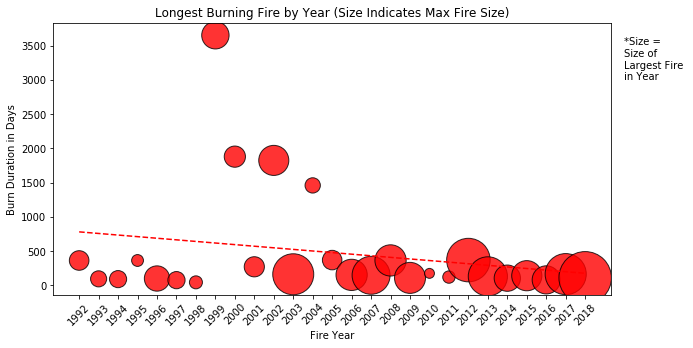

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(df_summary_max.index,df_summary_max.Burn_Days,s=df_summary_max.FIRE_SIZE*.006,c='red', alpha = .8,edgecolor='black')
plt.ylabel('Burn Duration in Days')
plt.xlabel('Fire Year')
plt.title('Longest Burning Fire by Year (Size Indicates Max Fire Size)')
plt.text(2020,3000,'''*Size = 
Size of 
Largest Fire 
in Year''')
plt.xticks(np.arange(1992,2019), rotation=45)

# Establish trend line
x = df_summary_max.index
y = df_summary_max.Burn_Days
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.savefig('Longest_FirexYear&Size.png')
plt.show()

In [28]:
## Averages thrown off by 2016-2018 Data

# plt.scatter(df_summary_avg.index,df_summary_avg.FIRE_SIZE,s=df_summary_avg.Burn_Days*50, c='orange', alpha=.7, edgecolor='black')
# plt.ylabel('Fire Size in Acres Burned')
# plt.xlabel('Fire Year')
# plt.title('Average Fire Size by Year')
# plt.show()

In [29]:
## Averages thrown off by 2016-2018 Data


# plt.scatter(df_summary_avg.index,df_summary_avg.Burn_Days,s=df_summary_avg.FIRE_SIZE, c='orange', alpha=.7, edgecolor='black')
# plt.ylabel('Fire Size in Acres Burned')
# plt.xlabel('Fire Year')
# plt.title('Average Fire Size by Year')
# plt.show()

### Seaborn Charts

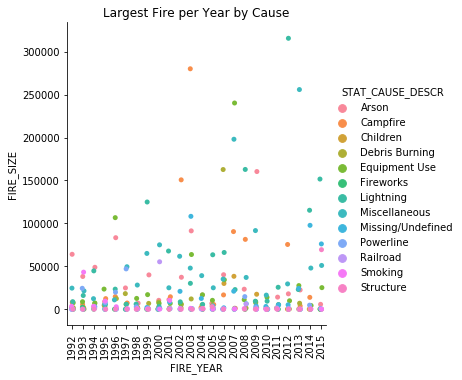

In [30]:
import seaborn as sns
temp = df_summary_YearxCause_max[['FIRE_SIZE']]
temp = temp.reset_index()

sns.catplot(x='FIRE_YEAR',y='FIRE_SIZE',hue='STAT_CAUSE_DESCR', data=temp)
plt.xticks(rotation=90)
plt.title('Largest Fire per Year by Cause')
plt.show()

In [31]:
## Largest Fire by County Commented out -- too many counties

#temp2 = df_summary_YearxCounty_max[['FIRE_SIZE']]
# temp2 = temp2.reset_index()

# sns.catplot(y='FIRE_SIZE', x='FIRE_YEAR', hue='FIPS_NAME', data=temp2)
# plt.xticks(rotation=90)
# plt.title('Largest Fire by County')

# Frequency Charts

In [32]:
# Create Data Frame of only class G Fires
Df_Location = df_summary[['FIRE_SIZE','FIRE_YEAR','LATITUDE','LONGITUDE','FIRE_SIZE_CLASS','FIPS_NAME']]
Df_Location_g = Df_Location[Df_Location['FIRE_SIZE_CLASS']=='G']
Df_Location_g.head()

,FIRE_SIZE,FIRE_YEAR,LATITUDE,LONGITUDE,FIRE_SIZE_CLASS,FIPS_NAME
16,16823.0,2004,38.523333,-120.211667,G,Amador
17,7700.0,2004,38.780000,-120.260000,G,El Dorado
1312,6255.0,2006,38.551667,-119.359444,G,Mono
1920,10584.0,2006,33.851944,-117.649722,G,Orange
2116,16677.0,2006,32.754444,-116.669167,G,San Diego


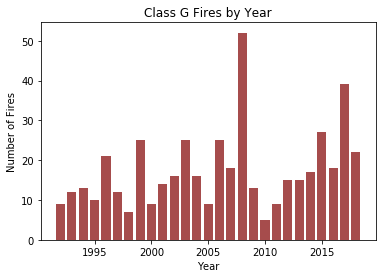

In [33]:
#Fire Frequency
df_location_g_year=Df_Location_g.groupby(['FIRE_YEAR']).count()
y2=df_location_g_year['FIRE_SIZE']
x2=df_location_g_year.index

plt.bar(x=x2,height=y2,color='maroon',alpha=.7)
plt.ylabel('Number of Fires')
plt.xlabel('Year')
plt.title('Class G Fires by Year')
plt.show()

# Latitude & Longitude Charts

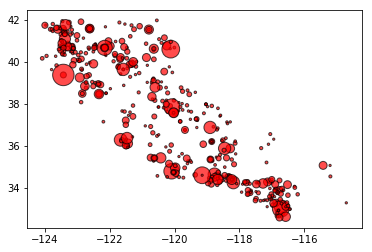

In [34]:
Df_Location = df_summary[['FIRE_SIZE','FIRE_YEAR','LATITUDE','LONGITUDE','FIRE_SIZE_CLASS','FIPS_NAME']]
Df_Location_g = Df_Location[Df_Location['FIRE_SIZE_CLASS']=='G']
Df_Location_g

y = Df_Location_g.LATITUDE
x = Df_Location_g.LONGITUDE

plt.scatter(x,y,s=Df_Location_g.FIRE_SIZE*.001,alpha=.7,edgecolor='black',c='red')
plt.show()

## Add Column to Class G Chart for Google Maps plot
>Convert Acres to Feet <br>
>Apply factor to reduce size based on Gmap Zoom level 6

In [35]:
# Add Column to Class G Chart for Google Maps plot
##
Df_Location_g['FIRE_SIZE_Chart']=Df_Location_g.FIRE_SIZE*.000135889
Df_Location_g.head(1)

C:\Users\chard\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,FIRE_SIZE,FIRE_YEAR,LATITUDE,LONGITUDE,FIRE_SIZE_CLASS,FIPS_NAME,FIRE_SIZE_Chart
16,16823.0,2004,38.523333,-120.211667,G,Amador,2.286061


In [36]:
# Import Bokeh and Specify Google Maps API Key
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap

gkey ='Your Key Here'

## Create plot of Class G Fires on top of Google Map, type: Terrain

In [37]:
# Create plot of Class G Fires on top of Google Map, type: Terrain
map_options = GMapOptions(lat=Df_Location_g.LATITUDE.mean(),lng=Df_Location_g.LONGITUDE.mean(), map_type="terrain", zoom=6)

p = gmap(gkey,map_options)
source = ColumnDataSource(
    data=dict(
        lat=Df_Location_g.LATITUDE.tolist(),
        lon=Df_Location_g.LONGITUDE.tolist(),
        size=Df_Location_g.FIRE_SIZE_Chart.tolist()))

p.circle(x="lon", y="lat", size='size', fill_color='red',fill_alpha=0.5,source=source)

show(p)

## Create plot of Class G Fires on top of Google Map, type: Roadmap

In [38]:
map_options = GMapOptions(lat=Df_Location_g.LATITUDE.mean(),lng=Df_Location_g.LONGITUDE.mean(), map_type="roadmap", zoom=6)

p2 = gmap(gkey,map_options)
source = ColumnDataSource(
    data=dict(
        lat=Df_Location_g.LATITUDE.tolist(),
        lon=Df_Location_g.LONGITUDE.tolist(),
        size=Df_Location_g.FIRE_SIZE_Chart.tolist()))

p2.circle(x="lon", y="lat", size='size', fill_color='red',fill_alpha=0.5,source=source)

show(p2)

# Map Data Using Google Maps API Directly

In [39]:
Df_Location = df_summary[['FIRE_SIZE','FIRE_YEAR','LATITUDE','LONGITUDE','FIRE_SIZE_CLASS','FIPS_NAME']]
Df_Location_g = Df_Location[Df_Location['FIRE_SIZE_CLASS']=='G']
Df_Location_g
lat_long = Df_Location_g[['LATITUDE', 'LONGITUDE']]
lat_long

cal_coords = (37, -120.00)
gmaps.figure(center=cal_coords, zoom_level=6)

fig_layer = gmaps.symbol_layer(lat_long, fill_color='red', stroke_color ='red', scale =2)
fig = gmaps.figure()
fig.add_layer(fig_layer)
fig

Figure(layout=FigureLayout(height='420px'))